In [2]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

from Fantasy import Fantasy

In [3]:
league = 'fal'

if league == 'fpl':
    url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
else:
    url = 'https://fantasy.allsvenskan.se/api/bootstrap-static/'

response = requests.get(url)
json = response.json()

# due to FDR
unwanted_teams = []

higher_than = {
    'value_season': 0, 
    'form': 0,
    'value_form' : 0,
    'minutes' : 90*5, 
    'points_per_game': 0
}

fantasy = Fantasy(json, unwanted_teams, higher_than)


def getBarPlot(column, element):
    pivot = fantasy.createPivot(column, element).sort_values(element)

    pivot.plot(kind='barh', x=column, figsize=(10,6))


def getScatterPlot(position, x, y):
    df = fantasy.dfFiltered('element_type', position, 'value_season')

    ax = df.plot.scatter(x=x, y=y, alpha=.5, figsize=(
        20, 10), title=f"{position}: {x} v {y}")

    for i, txt in enumerate(df.web_name):
        ax.annotate(txt, (df[x].iat[i], df[y].iat[i]))

    plt.grid(which='both', axis='both', ls='-')
    plt.show()


# Aggregate

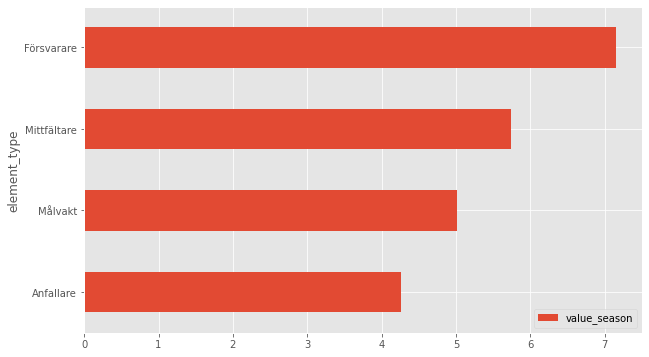

In [5]:
# Avg value per position
getBarPlot('element_type', 'value_season_adj')

In [ ]:
# Avg value per team
getBarPlot('team', 'value_season_adj')

In [ ]:
# Avg form per team
getBarPlot('team', 'form')

# Players overall

In [ ]:
# Most valuable 15
gk = fantasy.dfFiltered('element_type', 'Goalkeeper', 'value_season_adj').head(2)
defender = fantasy.dfFiltered('element_type', 'Defender', 'value_season_adj').head(5)
mid = fantasy.dfFiltered('element_type', 'Midfielder', 'value_season_adj').head(5)
fwd = fantasy.dfFiltered('element_type', 'Forward', 'value_season_adj').head(3)

top = gk.append(defender).append(mid).append(fwd)
top

In [ ]:
# Sorting by value season
fantasy.getPlayerDf().sort_values('value_season_adj', ascending=False).head(10)

In [ ]:
# Sorting by form
fantasy.getPlayerDf().sort_values('form', ascending=False).head(10)

In [ ]:
# Scatterplot of most valuable players

x = 'total_points'
y = 'value_season_adj'

top_gk = fantasy.dfFiltered('element_type', 'Goalkeeper', x).head()
top_def = fantasy.dfFiltered('element_type', 'Defender', x).head()
top_mid = fantasy.dfFiltered('element_type', 'Midfielder', x).head()
top_fwd = fantasy.dfFiltered('element_type', 'Forward', x).head()

ax = top_gk.plot.scatter(x=x, y=y, color='DarkBlue', label='GK', s=top_gk[x], alpha=.5, figsize=(15,10), title="Top 5 Players by Position")
for i, txt in enumerate(top_gk.web_name):
    ax.annotate(txt, (top_gk[x].iat[i],top_gk[y].iat[i]))

top_def.plot.scatter(x=x, y=y, color='DarkGreen', label='DEF', s=top_gk[x], ax=ax)
for i, txt in enumerate(top_def.web_name):
    ax.annotate(txt, (top_def[x].iat[i],top_def[y].iat[i]))
    
top_mid.plot.scatter(x=x, y=y, color='DarkOrange', label='MID', s=top_gk[x], ax=ax)
for i, txt in enumerate(top_mid.web_name):
    ax.annotate(txt, (top_mid[x].iat[i],top_mid[y].iat[i]))
    
top_fwd.plot.scatter(x=x, y=y, color='DarkRed', label='FWD', s=top_gk[x], ax=ax)
for i, txt in enumerate(top_fwd.web_name):
    ax.annotate(txt, (top_fwd[x].iat[i],top_fwd[y].iat[i]))

# Goalkeepers

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Goalkeeper', 'value_season_adj').head(5)

In [ ]:
# Form
fantasy.dfFiltered('element_type', 'Goalkeeper', 'form').head(5)

In [ ]:
getScatterPlot('Goalkeeper', 'form', 'value_season_adj')
getScatterPlot('Goalkeeper', 'now_cost', 'value_season_adj')

# Defenders

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Defender', 'value_season_adj').head(5)

In [ ]:
# Form
fantasy.dfFiltered('element_type', 'Defender', 'form').head(5)

In [ ]:
getScatterPlot('Defender', 'form', 'value_season_adj')
getScatterPlot('Defender', 'now_cost', 'value_season_adj')

# Midfielders

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Midfielder', 'value_season_adj').head(5)

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Midfielder', 'form').head(5)

In [ ]:
getScatterPlot('Midfielder', 'form', 'value_season_adj')
getScatterPlot('Midfielder', 'now_cost', 'value_season_adj')

# Forwards

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Forward', 'value_season_adj').head(5)

In [ ]:
# Value
fantasy.dfFiltered('element_type', 'Forward', 'form').head(5)

In [ ]:
getScatterPlot('Forward', 'form', 'value_season_adj')
getScatterPlot('Forward', 'now_cost', 'value_season_adj')